# MNIST Digit Classification Machine Learning Project

In [1]:
#Importing Required Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [2]:
#Loading the Data and Splitting it
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
#Checking the shapes
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

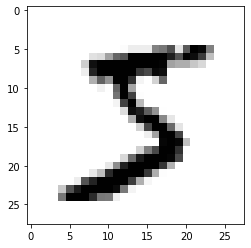

In [4]:
#Plotting the first training sample
plt.imshow(X_train[0],cmap='binary')

In [5]:
#Creating function to plotting the training sample
def plot_input_img(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

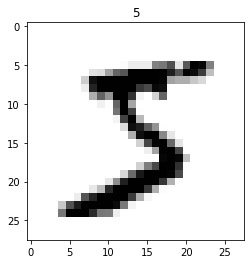

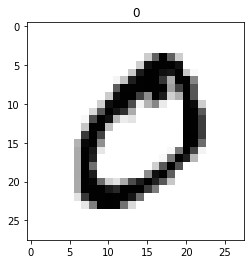

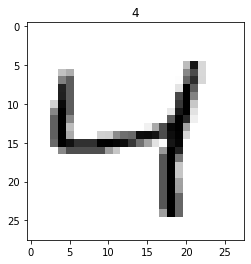

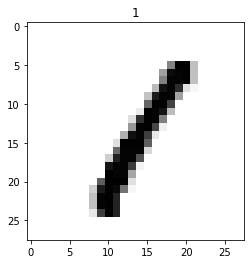

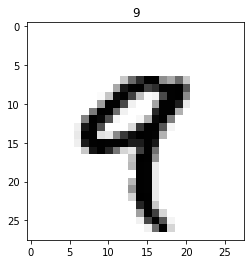

In [6]:
#Plotting the training sample with output 
for i in range(5):
    plot_input_img(i)

In [7]:
#Normailze the images into [0,1] range
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

In [8]:
#Expand the dimension of image to (28,28,1)
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [9]:
#Checking the dimension
X_train.shape

(60000, 28, 28, 1)

In [10]:
#Applying OneHot Ecoding to the values
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [11]:
#Checking the output values 
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
#Build Model
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [13]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [14]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [15]:
his=model.fit(X_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 22s 16ms/step - loss: 0.2112 - accuracy: 0.9350 - val_loss: 0.0741 - val_accuracy: 0.9779
Epoch 2/10
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0701 - accuracy: 0.9780 - val_loss: 0.0615 - val_accuracy: 0.9811
Epoch 3/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.0529 - val_accuracy: 0.9842
Epoch 4/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0503 - val_accuracy: 0.9851
Epoch 5/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0374 - accuracy: 0.9878 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 6/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0307 - accuracy: 0.9897 - val_loss: 0.0395 - val_accuracy: 0.9883
Epoch 7/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0369 -

In [17]:
score=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9897


In [18]:
print(f" the model accuracy is {score[1]}")

 the model accuracy is 0.9897000193595886
